Weekly Q&A session to the BADS course

---

# Debugging

The outline:
* Debugging in Google Colab and others 
  * Useful commands for Debugging
  * Debugging with `%debug` magic
  * Debugging with `IPython.core.debugger.set_trace`
  * Debugging with `IPython.core.debugger.Tracer`
* (Visually) Debugging in JupyterLab using `xeus-python` kernel
  * Installation
  * Usage
* Summary

## Debugging in Google Colab and others

### Useful commands for Debugging
*   **n**: run the next line of code (The → arrow shows you the current position)
*   **c**: continue until the next breakpoint
*   **q**: quit the debugger and code execution
*   **name_of_variable**: current (!) value of the variable

### Debugging with `%debug` magic
When you encounter an error or exception
1.   open a new notebook cell (after an error message)
2.   type `%debug`
3.   run the cell

This will open a command line where you can test your code and inspect all variables right up to the line that threw the error

In [ ]:
list1 = [1,2,3,4]
list2 = [5,6,7,8]
result = []
for item in zip(list1, list2):
    temp_sum = sum(item)
    # Adding a line that will produce an error
    result.append(1/0)
    result.append(temp_sum)
result


In [8]:
%debug

> <ipython-input-7-7f2d8538ed7d>(7)<module>()
      5     temp_sum = sum(item)
      6     # Adding a line that will produce an error
----> 7     result.append(1/0)
      8     result.append(temp_sum)
      9 result

ipdb> item
(1, 5)
ipdb> temp_sum
6
ipdb> result
[]
ipdb> c


### Debugging with `IPython.core.debugger.set_trace`

To use this functionality, first import the `set_trace` from the `IPython.core.debugger`. To set a breakpoint, add `set_trace()` to the code.
When executing a cell, it will stop at the first breakpoint and open the command line for code inspection.

In [9]:
from IPython.core.debugger import set_trace

list1 = [1,2,3,4]
list2 = [5,6,7,8]
result = []
for item in zip(list1, list2):
    set_trace() # breakpoint
    temp_sum = sum(item)
    result.append(temp_sum)
result

> <ipython-input-9-a090f83cfbba>(8)<module>()
      6 for item in zip(list1, list2):
      7     set_trace() # breakpoint
----> 8     temp_sum = sum(item)
      9     result.append(temp_sum)
     10 result

ipdb> item
(1, 5)
ipdb> temp_sum
6
ipdb> result
[]
ipdb> c
> <ipython-input-9-a090f83cfbba>(7)<module>()
      5 result = []
      6 for item in zip(list1, list2):
----> 7     set_trace() # breakpoint
      8     temp_sum = sum(item)
      9     result.append(temp_sum)

ipdb> item
(2, 6)
ipdb> temp_sum
6
ipdb> n
> <ipython-input-9-a090f83cfbba>(8)<module>()
      6 for item in zip(list1, list2):
      7     set_trace() # breakpoint
----> 8     temp_sum = sum(item)
      9     result.append(temp_sum)
     10 result

ipdb> item
(2, 6)
ipdb> temp_sum
6
ipdb> c
> <ipython-input-9-a090f83cfbba>(7)<module>()
      5 result = []
      6 for item in zip(list1, list2):
----> 7     set_trace() # breakpoint
      8     temp_sum = sum(item)
      9     result.append(temp_sum)

ipdb> item
(3, 7)

### Debugging with `IPython.core.debugger.Tracer`

Similar to the `IPython.core.debugger.set_trace`.

In [10]:
from IPython.core.debugger import Tracer; 
list1 = [1,2,3,4]
list2 = [5,6,7,8]
result = []
for item in zip(list1, list2):
    temp_sum = sum(item)
    result.append(temp_sum)
    Tracer()() # breakpoint
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  


> <ipython-input-10-0e25a44a2264>(5)<module>()
      3 list2 = [5,6,7,8]
      4 result = []
----> 5 for item in zip(list1, list2):
      6     temp_sum = sum(item)
      7     result.append(temp_sum)

ipdb> item
(1, 5)
ipdb> temp_sum
6
ipdb> result
[6]
ipdb> c


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  """


> <ipython-input-10-0e25a44a2264>(5)<module>()
      3 list2 = [5,6,7,8]
      4 result = []
----> 5 for item in zip(list1, list2):
      6     temp_sum = sum(item)
      7     result.append(temp_sum)

ipdb> item
(2, 6)
ipdb> temp_sum
8
ipdb> result
[6, 8]
ipdb> q
Exiting Debugger.


## (Visually) Debugging in JupyterLab using `xeus-python` kernel

The first release of the visual debugger for JupyterLab became available in March 2020. Using debugger requires a `xeus-python` kernel that implements the Jupyter Debug Protocol. The `xeus-python` kernel and the debugger extension need to be installed. (The future versions of JupyterLab will include the debugger by default).

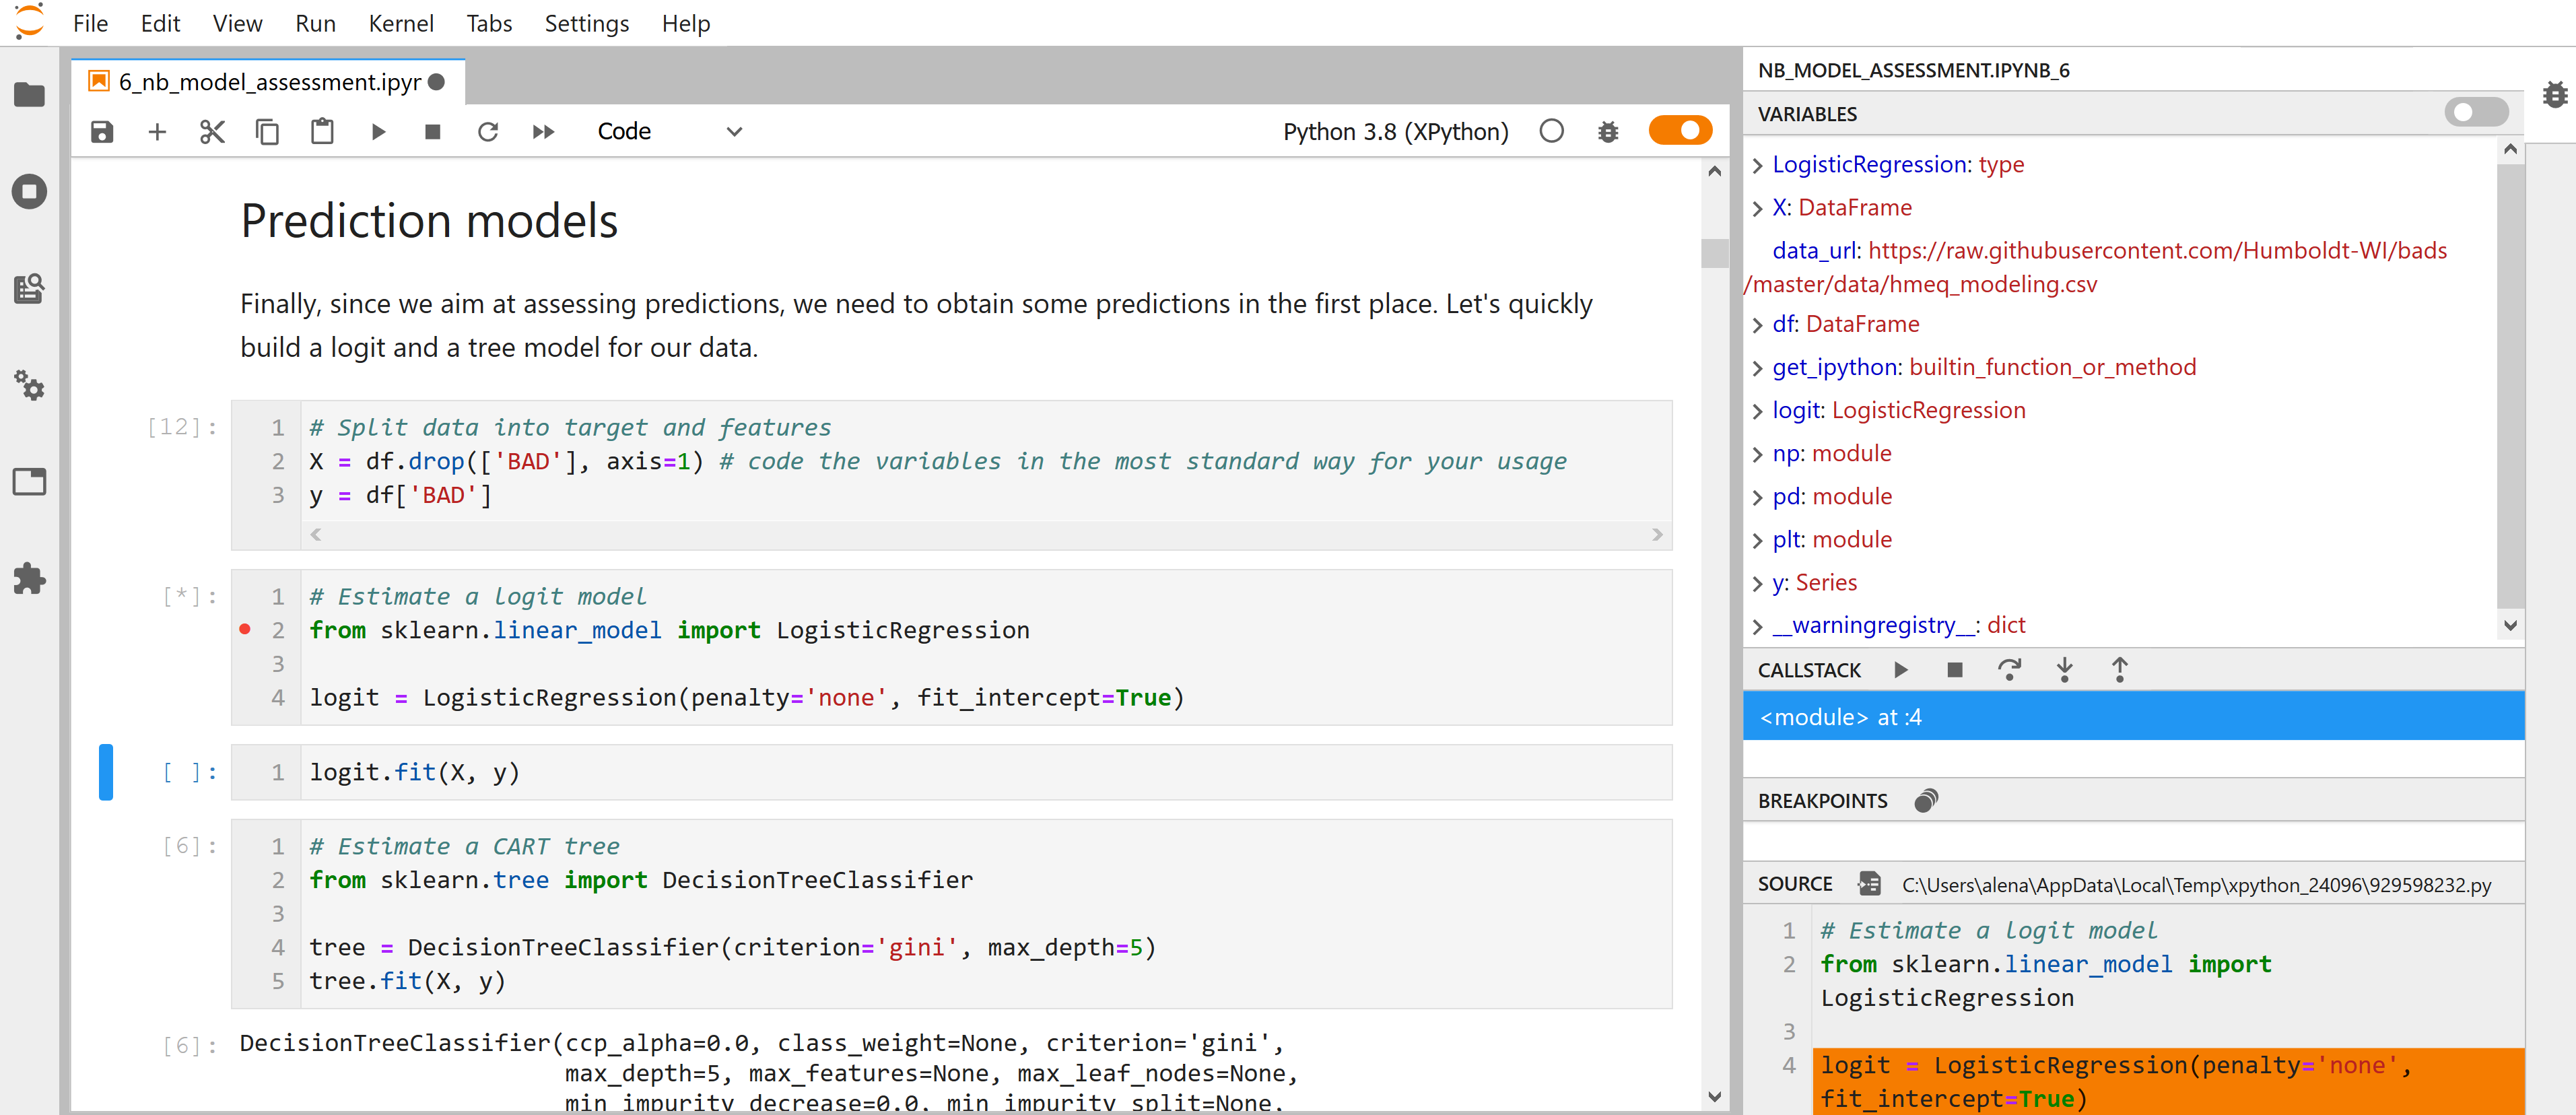


### Installation (via terminal)
1. Create a virtual environment (if you don't use any yet)

`conda create -n name_of_your_env -c conda-forge xeus-python=0.8.0 notebook=6 jupyterlab=2 ptvsd nodejs`
2. Activate your virtual environment

`conda activate name_of_your_env`
3. Install the debugger front-end as a JupyterLab extension

`jupyter labextension install @jupyterlab/debugger`
4. You may need to install the `pydevd` 

`pip3 install pydevd`
5. open the JupyterLab 

`jupyter lab`

### Usage
After you have installed the kernel, you will find it in the JupyterLab Launcher as Python 3.8 (XPython). 

To start the debugger mode:
* open the notebook, you want to debug
* make sure to switch to the `xeus` (XPython) kernel in the field **a** (see the figure below)

(For example, if you see  "Python 3" in the field **a** -> click on it -> select from the dropdown menu "Start Preferred Kernel" : "Python 3.8 (XPython)" - click on "Select"
* click on the button in the field **b** (it should become orange)
* expand the variables view by clicking on the bug symbol in **c**

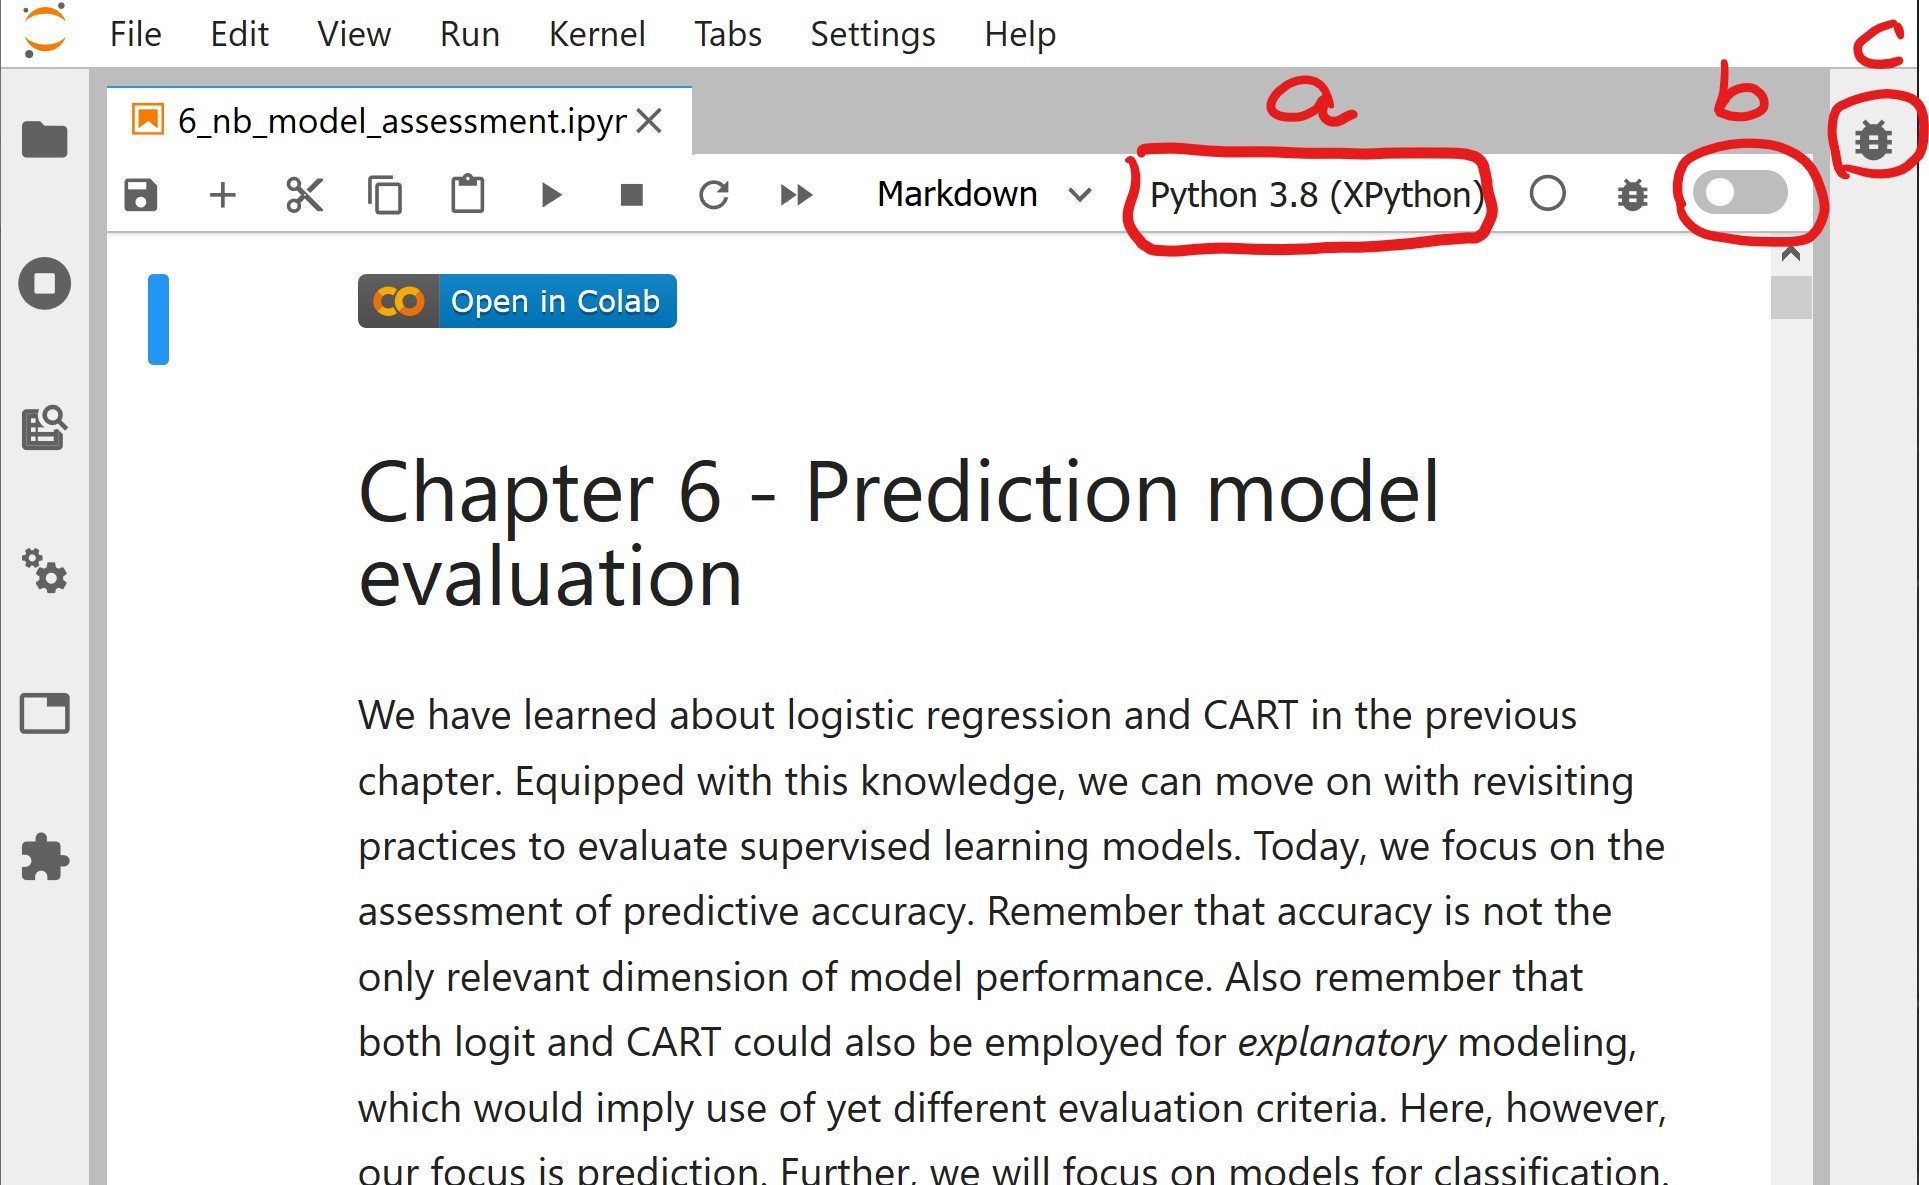

In [ ]:
# Example 1 (from above)
list1 = [1,2,3,4]
list2 = [5,6,7,8]
result = []
for item in zip(list1, list2):
    temp_sum = sum(item)
    result.append(temp_sum)
result

In [ ]:
# Example 2
import numpy as np
def toy_data(n=1000, mu1=[1,1], mu2=[4, 4], sig1=1, sig2=1):
    """ Customer function to generate linearly seperable toy data. The code has been discussed in more detail in Tutorial #3.
        
        The arguments represent, respectively, the size of the data, the mean vectors of the two Gaussians from which we
        sample class 1 and class 2 data points, and their standard deviations.
    """
    
    class1_x1 = np.random.normal(loc=mu1[0], scale=sig1, size=n)
    class1_x2 = np.random.normal(loc=mu1[1], scale=sig1, size=n)

    class2_x1 = np.random.normal(loc=mu2[0], scale=sig2, size=n)
    class2_x2 = np.random.normal(loc=mu2[1], scale=sig2, size=n)

    y1 = np.repeat(0, n)
    y2 = np.repeat(1, n)

    class1 = np.vstack((class1_x1, class1_x2)).T
    class2 = np.vstack((class2_x1, class2_x2)).T

    X = np.vstack((class1,class2))
    y = np.concatenate((y1,y2))
    
    return X, y

X, y = toy_data()

In [ ]:
# Example 3
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def loss(h, y):
    return (-y*np.log(h) - (1 - y)*np.log(1 - h))
def estimate_logit_model(X, y, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
    
    # Add intercept to the model if needed
    if fit_intercept:
      intercept = np.ones((X.shape[0], 1))
      X = np.concatenate((intercept, X), axis=1)
        
    weights = np.zeros(X.shape[1]) # initialize weights
    
    for i in range(num_iter): # travels down the gradient as many times as there are iterations
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= lr * gradient
            
    if(verbose == True and i % 10000 == 0): # checks loss at each iteration
        z = np.dot(X, weights)
        h = sigmoid(z)
        loss_val = loss(h, y)
        print(f'loss: {loss_val} \t')
    return weights

print(estimate_logit_model(X, y))

[-10.82452672   2.34105171   2.07464057]


## Summary
- use debugging to examine your code
- select/put the breakpoints depending on where you want to pause your code
- use `%debug` after you encounter an error
- use `Tracer` or `set_trace` to debug your code in Google Colab (also without errors)
- use `xeus-python` kernel to visually debug your code in JupyterLab 

## Resources

1.   Project Jupyter. (2020) A visual debugger for Jupyter. *Medium.* https://blog.jupyter.org/a-visual-debugger-for-jupyter-914e61716559 
2.   Rieke C. (2018) Jupyter Tips and Tricks. *Medium.* https://chrieke.medium.com/jupyter-tips-and-tricks-994fdddb2057


